#Практическая работа номер 2 по дисциплине "Системы сбора событий и логов"

#На тему: "Анализ логов"

Выполнил студент группы ББМО-02-23 Беляев Степан Константинович

Вариант №2: 1 mod 16 + 1 = 2 (Apache)

#Клонирование репозитория с логами для их анализа:

In [ ]:
import os.path

if not os.path.isdir("./loghub/"):
    !git clone https://github.com/logpai/loghub

#Задание шаблонного выражения для парсинга логов:

Пояснение к шаблонному выражению:

Для примера возьмем строчку из логов Apache

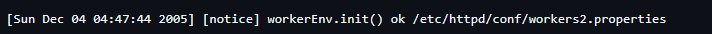

Поля лога:

*   Sun - Day
*   Dec - Month
*   04 - Number
*   04:47:44 - Time
*   2005 - Year
*   notice - Level
*   workerEnv.init() ok /etc/httpd/conf/workers2.properties - Content




In [ ]:
import re

log_line = "[Sun Dec 04 04:47:44 2005] [notice] workerEnv.init() ok /etc/httpd/conf/workers2.properties"
pattern = r'\[(\w{3}) (\w{3}) (\d{1,2}) (\d{1,2}:\d{1,2}:\d{1,2}) (\d{2,4})\] (\[\w+\]) (.*)'

 matches = re.match(pattern, log_line)
if matches:
  day = matches.group(1)
  month = matches.group(2)
  num = matches.group(3)
  time = matches.group(4)
  year = matches.group(5)
  level = matches.group(6)
  content = matches.group(7)

print("Day:", day)
print("Month:", month)
print("Num:",  num)
print("Time:", time)
print("Year:", year)
print("Level:", level)
print("Content:", content)

##Создание базы данных

In [ ]:
if not os.path.isdir("./db/"):
  os.makedirs("./db/")

In [ ]:
import sqlite3
# Путь к файлу, хранящему БД
db_path = './db/log-analysis.db'
# Подключение к БД
connection = sqlite3.connect(db_path)
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS logs")
# Создание таблицы
cursor.execute("CREATE TABLE logs (Id INTEGER PRIMARY KEY AUTOINCREMENT, day, month, num, time, year, level, content)")
connection.commit()
cursor.close()
connection.close()

In [ ]:
# Подключение к БД и создание курсора
connection = sqlite3.connect(db_path)
cursor = connection.cursor()
# Очистка таблицы (избежание дублирования данных)
cursor.execute("DELETE FROM logs")
# Парсинг файла с логами
with open('/content/loghub/Apache/Apache_2k.log', 'r', encoding='utf') as log_file:
    for line in log_file:
        log_match = re.match(pattern, line)
        if log_match:
              day = log_match.group(1)
              month = log_match.group(2)
              num = log_match.group(3)
              time = log_match.group(4)
              year = log_match.group(5)
              level = log_match.group(6)
              content = log_match.group(7)
              values = (day, month, num, time, year, level, content) # Создание объекта для подстановки в SQL-запрос
              sql = "INSERT INTO logs (Day, Month, Num, Time, Year, Level, Content) VALUES (?, ?, ?, ?, ?, ?, ?)"
              cursor.execute(sql, values) # Запись данных в БД
              print(day, month, num, time, year, level, content)
# Сохранение внесенных изменений
connection.commit()
# Отключение курсора
cursor.close()
# Отключение от БД
connection.close()

Sun Dec 04 04:47:44 2005 [notice] workerEnv.init() ok /etc/httpd/conf/workers2.properties
Sun Dec 04 04:47:44 2005 [error] mod_jk child workerEnv in error state 6
Sun Dec 04 04:51:08 2005 [notice] jk2_init() Found child 6725 in scoreboard slot 10
Sun Dec 04 04:51:09 2005 [notice] jk2_init() Found child 6726 in scoreboard slot 8
Sun Dec 04 04:51:09 2005 [notice] jk2_init() Found child 6728 in scoreboard slot 6
Sun Dec 04 04:51:14 2005 [notice] workerEnv.init() ok /etc/httpd/conf/workers2.properties
Sun Dec 04 04:51:14 2005 [notice] workerEnv.init() ok /etc/httpd/conf/workers2.properties
Sun Dec 04 04:51:14 2005 [notice] workerEnv.init() ok /etc/httpd/conf/workers2.properties
Sun Dec 04 04:51:18 2005 [error] mod_jk child workerEnv in error state 6
Sun Dec 04 04:51:18 2005 [error] mod_jk child workerEnv in error state 6
Sun Dec 04 04:51:18 2005 [error] mod_jk child workerEnv in error state 6
Sun Dec 04 04:51:37 2005 [notice] jk2_init() Found child 6736 in scoreboard slot 10
Sun Dec 04 04:

In [ ]:
import pandas as pd
# Подключение к БД и создание курсора
connection = sqlite3.connect(db_path)
cursor = connection.cursor()
# Выборка всех записей из таблицы
cursor.execute("SELECT * FROM logs")
rows = cursor.fetchall()
# Отключение курсора
cursor.close()
# Отключение от БД
connection.close()
# Запись данных в объект DataFrame
log_df = pd.DataFrame(rows, columns=("ID", "Day", "Month", "Num", "Time", "Year", "Level", "Content"))
log_df

,ID,Day,Month,Num,Time,Year,Level,Content
0,2001,Sun,Dec,04,04:47:44,2005,[notice],workerEnv.init() ok /etc/httpd/conf/workers2.p...
1,2002,Sun,Dec,04,04:47:44,2005,[error],mod_jk child workerEnv in error state 6
2,2003,Sun,Dec,04,04:51:08,2005,[notice],jk2_init() Found child 6725 in scoreboard slot 10
3,2004,Sun,Dec,04,04:51:09,2005,[notice],jk2_init() Found child 6726 in scoreboard slot 8
4,2005,Sun,Dec,04,04:51:09,2005,[notice],jk2_init() Found child 6728 in scoreboard slot 6
...,...,...,...,...,...,...,...,...
1995,3996,Mon,Dec,05,19:14:11,2005,[error],mod_jk child workerEnv in error state 6
1996,3997,Mon,Dec,05,19:15:55,2005,[notice],jk2_init() Found child 6791 in scoreboard slot 8
1997,3998,Mon,Dec,05,19:15:55,2005,[notice],jk2_init() Found child 6790 in scoreboard slot 7
1998,3999,Mon,Dec,05,19:15:57,2005,[notice],workerEnv.init() ok /etc/httpd/conf/workers2.p...


##Построение графика распределения записей по 10 наиболее часто встречающимся Сообщениям группы Content

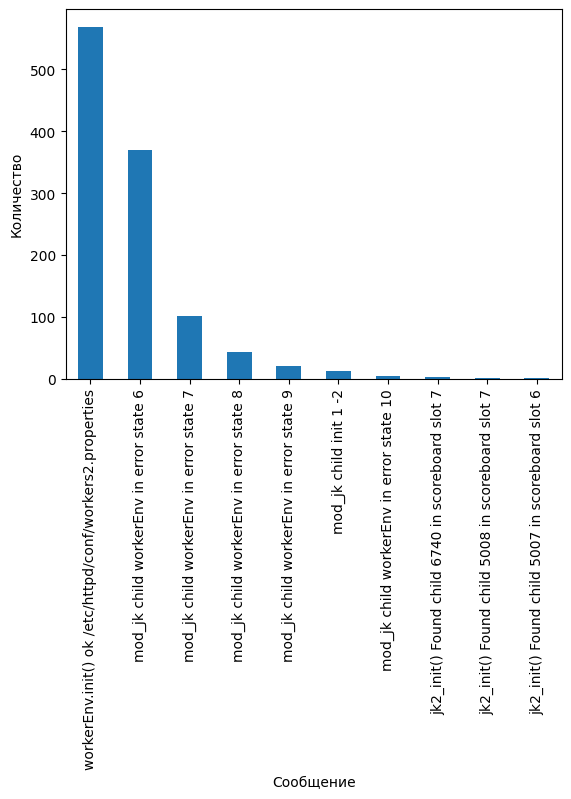

In [ ]:
import matplotlib.pyplot as plt

components_distrib = log_df['Content'].value_counts()[:10]

components_distrib.plot(kind='bar')

plt.xlabel('Сообщение')
plt.ylabel('Количество')
plt.show()

##Распределение общего количества записей по типу

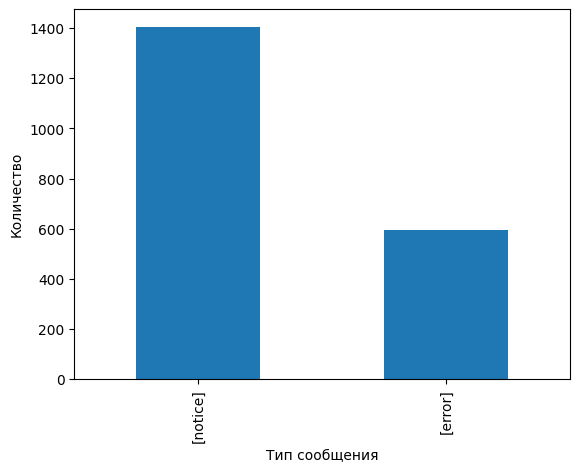

In [ ]:
import matplotlib.pyplot as plt

components_distrib = log_df['Level'].value_counts()[:3]

components_distrib.plot(kind='bar')

plt.xlabel('Тип сообщения')
plt.ylabel('Количество')
plt.show()

##График количества событий за все время

<ipython-input-25-89c9af253ef1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  log_df['timestamp'] = pd.to_datetime(log_df['Time'].astype(str))


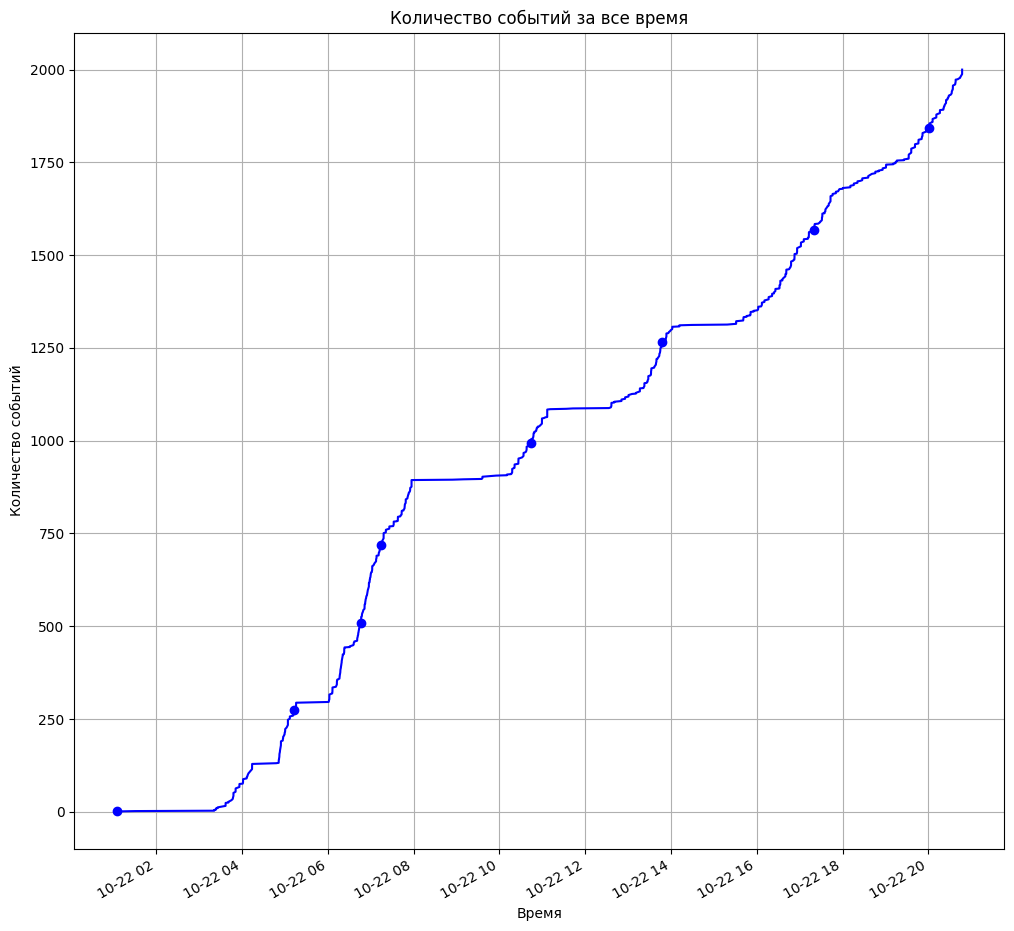

In [ ]:
log_df['timestamp'] = pd.to_datetime(log_df['Time'].astype(str))

log_df = log_df.dropna(subset=['timestamp'])

events_per_time = log_df.groupby('timestamp').size().cumsum()

plt.figure(figsize=(12, 12))
events_per_time.plot(marker='o', linestyle='-', color='b', markevery=100)
plt.title('Количество событий за все время')
plt.xlabel('Время')
plt.ylabel('Количество событий')
plt.grid(True)
plt.show()